<a href="https://colab.research.google.com/github/Thomasjoseph2/machine_life_ml/blob/main/Machine_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
machine_data = pd.read_csv('/content/train.csv')

In [ ]:
machine_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
machine_data.tail()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0
136428,136428,L47937,L,296.9,308.1,1557,39.3,229,0,0,0,0,0,0


In [ ]:
machine_data.shape

(136429, 14)

In [45]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [44]:
# prompt: find the null values and analyse the data and tell me mean median which one i can use in the null values place

machine_data.isnull().sum()


id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
machine_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
machine_data_numeric = machine_data.drop('Product ID', axis=1)

In [ ]:
# Identify non-numeric columns
non_numeric_cols = machine_data_numeric.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numerical using one-hot encoding
machine_data_encoded = pd.get_dummies(machine_data_numeric, columns=non_numeric_cols)

In [ ]:

# Calculate correlations on the purely numeric DataFrame
correlations = machine_data_encoded.corr().round(2)
print(correlations)

                           id  Air temperature [K]  Process temperature [K]  \
id                       1.00                -0.01                    -0.00   
Air temperature [K]     -0.01                 1.00                     0.86   
Process temperature [K] -0.00                 0.86                     1.00   
Rotational speed [rpm]   0.00                 0.02                     0.01   
Torque [Nm]             -0.00                -0.01                    -0.01   
Tool wear [min]         -0.00                 0.02                     0.01   
Machine failure          0.00                 0.07                     0.03   
TWF                     -0.00                 0.00                     0.00   
HDF                     -0.00                 0.10                     0.04   
PWF                      0.00                 0.01                     0.00   
OSF                      0.00                 0.01                     0.01   
RNF                      0.00                 0.00  

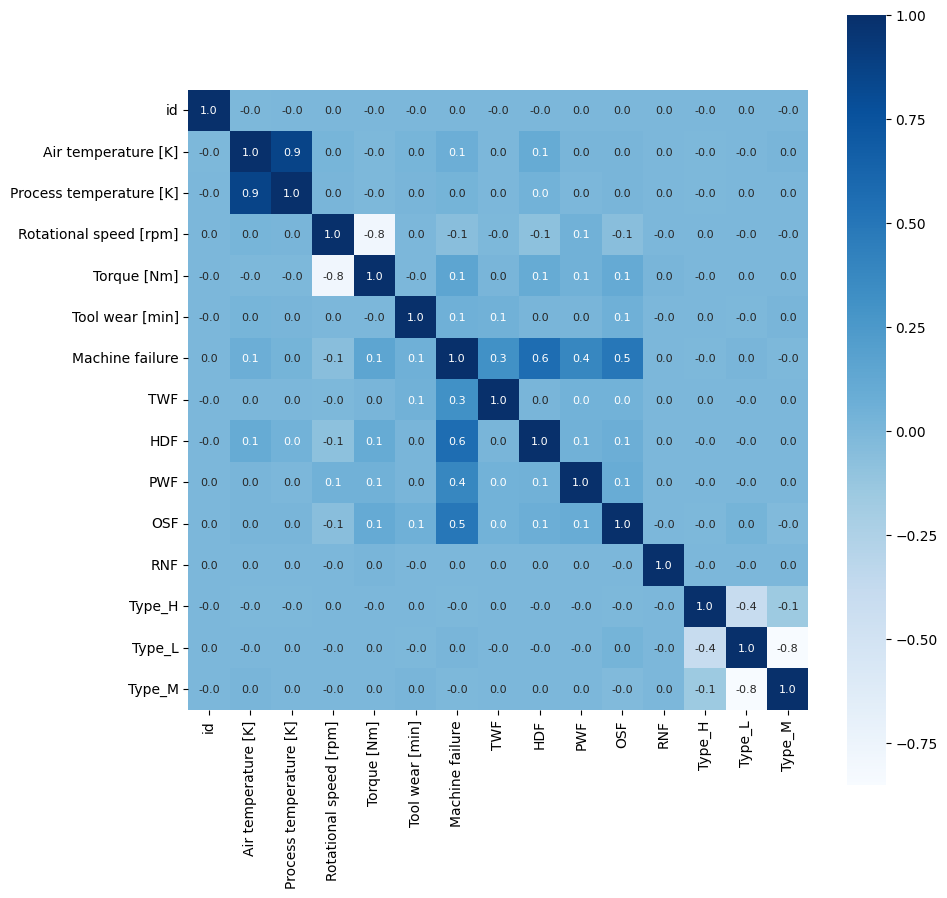

In [43]:
# Constructing a heat map
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()


In [ ]:
# Define the target variable and features
features = ['Torque [Nm]', 'TWF', 'HDF', 'PWF', 'OSF']
X = machine_data_encoded[features]
y = machine_data_encoded['Machine failure']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(y_test)

123128    1
54705     0
40016     0
75025     0
120421    0
         ..
101443    0
93071     0
75849     0
52610     0
31838     0
Name: Machine failure, Length: 27286, dtype: int64


In [46]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [51]:
print(y_test)

123128    1
54705     0
40016     0
75025     0
120421    0
         ..
101443    0
93071     0
75849     0
52610     0
31838     0
Name: Machine failure, Length: 27286, dtype: int64


In [50]:
print(y_pred)


[1 0 0 ... 0 0 0]


In [40]:
from logging import error
#r squared error
error_score=metrics.r2_score(y_test,y_pred)
print("R squared error : ",error_score)

R squared error :  0.7534545282651401
